### **FIGURES AND STATISTICS**
by J. Daniel Velez

The code is intended to plot some figures (stacked bars, CDF, scatterplots) and to calculate Spearmans and Pearson correlation coefficients

In [1]:
from f_filter_process import get_file, call_file, export_dataframe
import matplotlib.pyplot as plt
from f_stats import*
import pandas as pd
import os

In [29]:
# Function to import files
rivers_budget = call_file() 

In [ ]:
rivers_budget

### 1. This section shows the reaches and nodes remaining and deleted after the filtering process. CSV file must be used

In [ ]:
#csv files
river_budgetlis = rivers_budget.reset_index()
selected_data = river_budgetlis[['RIVER', 'REMAINING', 'DELETED']]
selected_data

In [ ]:
# Subseting rivers at reach level
subset_reaches = selected_data[selected_data['RIVER'].str.contains('Reaches')]
print(subset_reaches)

In [ ]:
# Stacked bar plot to get the accountability of the reaches and nodes left after the filtered process
selected_data.plot(x='RIVER', y=['REMAINING', 'DELETED'], kind='bar', stacked=True,  figsize=(10, 5))
plt.title('Rivers nodes and reaches final balance')
plt.xlabel('River reaches and nodes')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of reaches and nodes')
plt.show()

### 2. Correlation coefficients. Json files must be used

In [30]:
# Function to calculate Spearman coefficient, p-values, and number the pairs used to calculate Spearman. Load the filtered dictionary
rho_df= S_correlation(rivers_budget)

Node 81241000010011: Spearman Correlation = -0.7999999999999999, p-value = 0.10408803866182788, Number of pairs = 5
Node 81241000070421: Spearman Correlation = -0.5, p-value = 0.6666666666666667, Number of pairs = 3
Node 81241000070431: Spearman Correlation = -0.5, p-value = 0.6666666666666667, Number of pairs = 3
Node 81241000070441: Spearman Correlation = 0.5, p-value = 0.6666666666666667, Number of pairs = 3
Node 81241000070501: Spearman Correlation = 0.0, p-value = 1.0, Number of pairs = 4
Node 81241000070511: Spearman Correlation = 0.19999999999999998, p-value = 0.747060078104662, Number of pairs = 5
Node 81241000070531: Spearman Correlation = -0.5, p-value = 0.6666666666666667, Number of pairs = 3
Node 81241000080321: Spearman Correlation = 0.5, p-value = 0.6666666666666667, Number of pairs = 3
Node 81241000090291: Spearman Correlation = 0.5, p-value = 0.6666666666666667, Number of pairs = 3
Node 81241000090401: Spearman Correlation = 0.7, p-value = 0.18812040437418728, Number of

In [31]:
rho_df = rho_df.rename(columns = {'index':'node_id'})
rho_df

,node_id,spearman_corr,p_value,num_pairs
0,81241000010011,-0.800000,0.104088,5
1,81241000070421,-0.500000,0.666667,3
2,81241000070431,-0.500000,0.666667,3
3,81241000070441,0.500000,0.666667,3
4,81241000070501,0.000000,1.000000,4
...,...,...,...,...
2547,81247900210491,0.254545,0.450037,11
2548,81247900210501,0.666667,0.049867,9
2549,81247900210521,0.600000,0.284757,5
2550,81247900210531,0.800000,0.009628,9


Text(0.5, 1.0, 'Histogram of the Valid pairs')

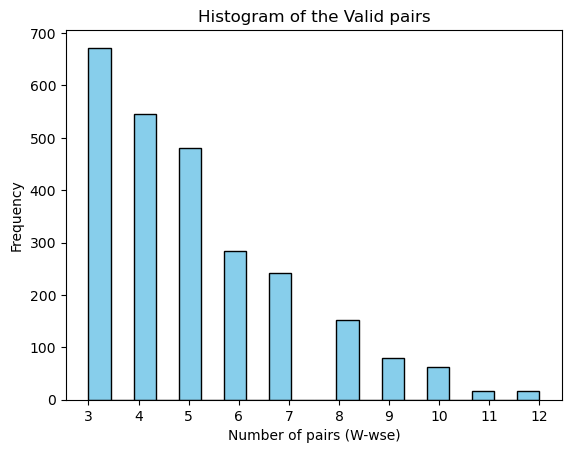

In [34]:
# Histogram of pairs used to calculate spearmans
plt.hist(rho_df['num_pairs'], bins=20, color='skyblue',edgecolor='black')
x_ticks = np.arange(int(min(rho_df['num_pairs'])), int(max(rho_df['num_pairs'])) + 1, 1)  # Generate integer ticks
plt.xticks(x_ticks)
plt.xlabel('Number of pairs (W-wse)')
plt.ylabel('Frequency')
plt.title('Histogram of the Valid pairs')

In [32]:
export_dataframe(rho_df,is_geodataframe=False)

2024-10-08 13:38:34.690 python[11506:420347] The class 'NSSavePanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


DataFrame has been exported to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Tanana/csv/4_bits_filter/rho_pairs_Tan_N_4b_dark.csv


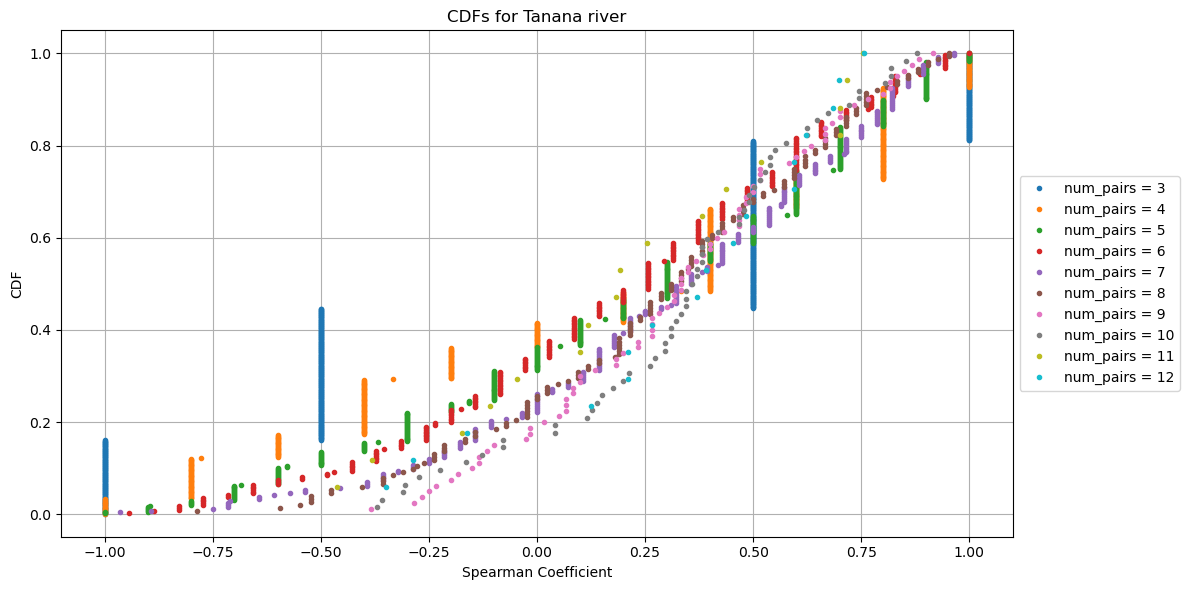

In [33]:
plot_multiple_cdfs(rho_df,'Tanana')

### **3.** Spearman's coefficient attached to shapefiles

In [44]:
river_shp = call_file()

In [ ]:
river_shp

In [36]:
# Function to join a geodataframe (gdf) with a daframe (df) as a new geodataframe. Arguments: gdf, df, reach_id or node_id
river_shp_Sp = geojoin(river_shp,rho_df,'node_id')

In [37]:
export_dataframe(river_shp_Sp,is_geodataframe=True)

GeoDataFrame has been exported as a GeoPackage to /Users/josele/Library/CloudStorage/GoogleDrive-ejdvc757@gmail.com/Other computers/My MacBook Pro/PhD/Dissertation/3_output/Tanana/Shps/4_bits_filter/rho_Tan_node_4b_dark.gpkg


### **4.** Scattter plots
There is a second optional argument to set the minimum Spearman coefficient from which the scatterplots should be plotted.

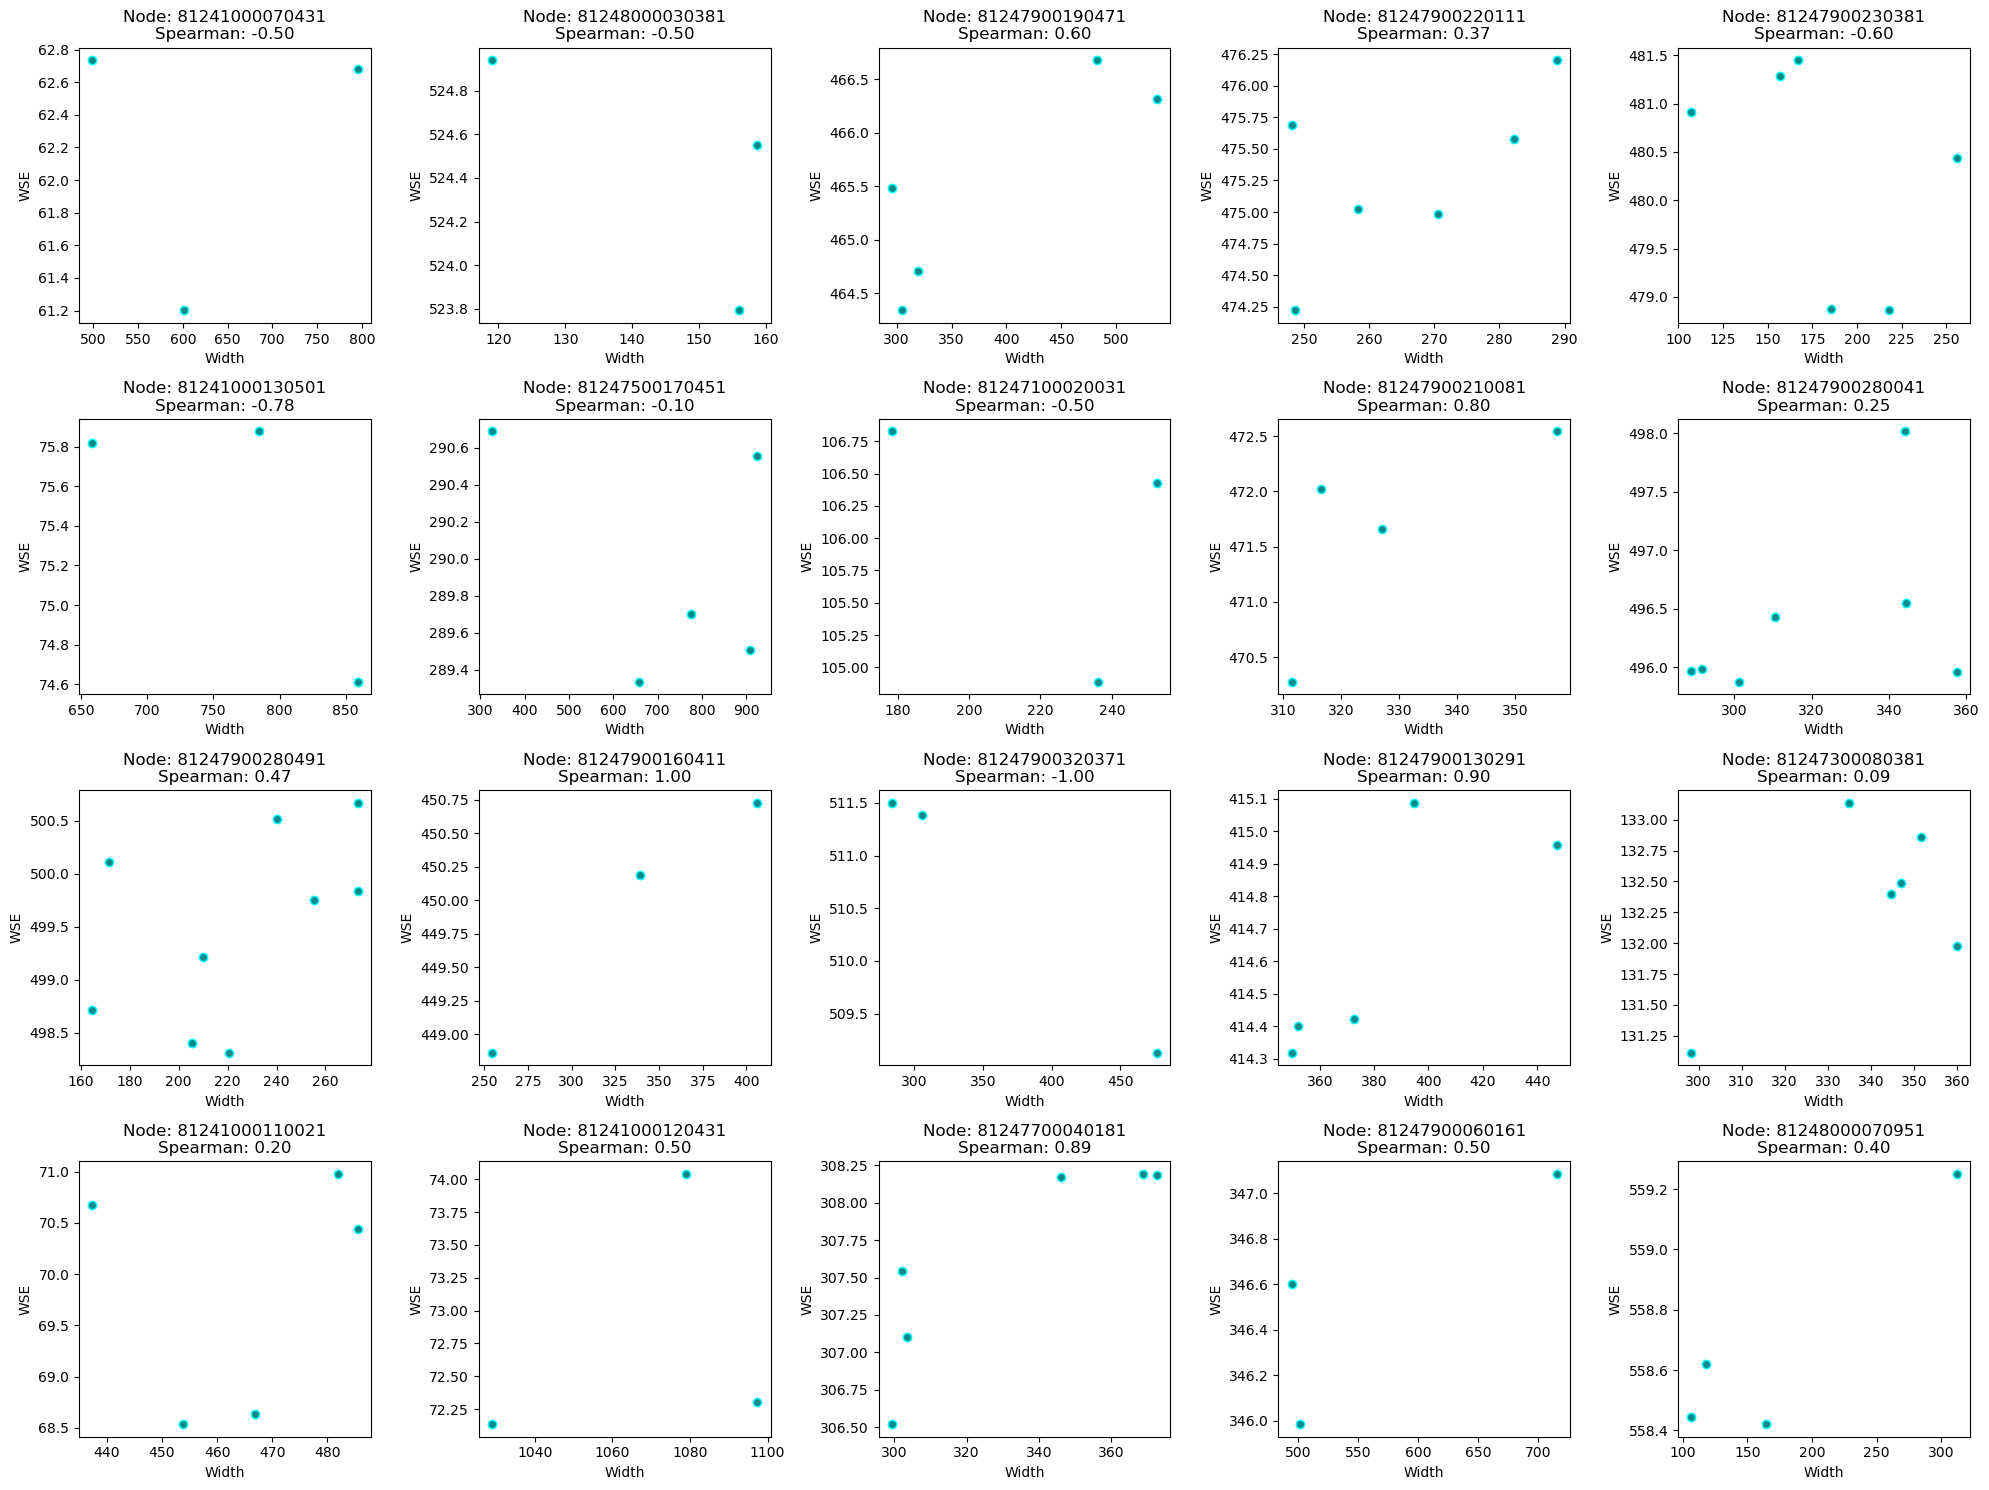

In [42]:
hypsometric(rivers_budget)

In [45]:
river_shape8 = call_file()

In [46]:
river_shape4 = call_file()

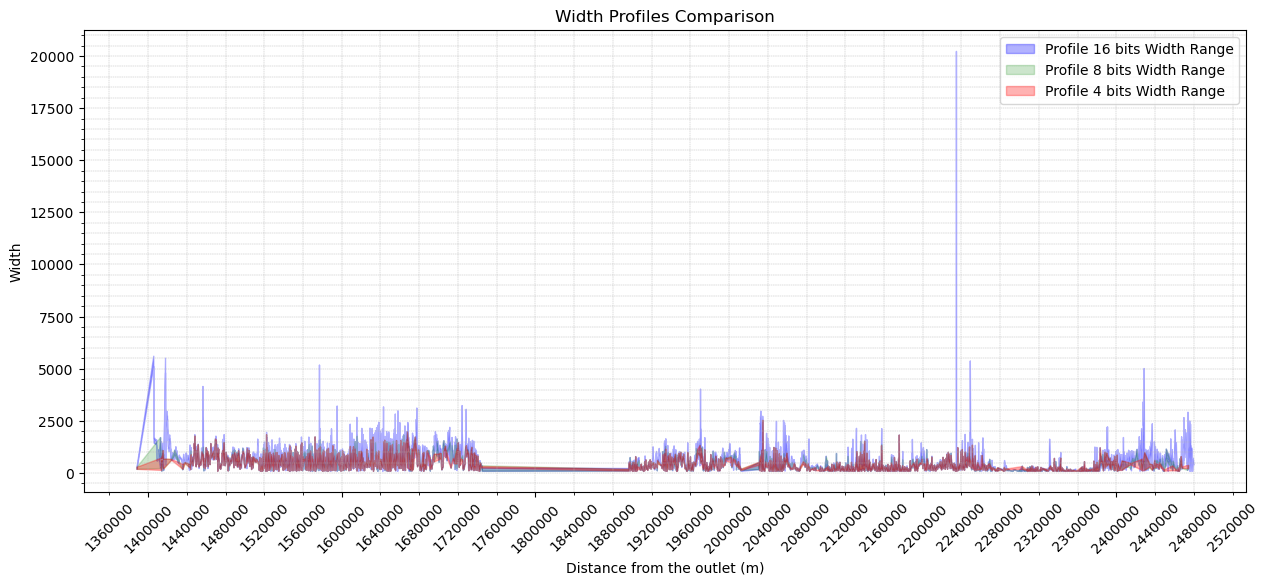

In [48]:
# admits up to 3 arguments (Shapefiles)
profiles(river_shp,river_shape8,river_shape4)